<a href="https://colab.research.google.com/github/AlenGeorge12/Diabetic-Retinopathy-Detection---Machine-Learning/blob/main/ML_PROJECT_DRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import shutil
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Corrected import


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/archive/train.csv')

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

df['type'] = df['diagnosis'].map(diagnosis_dict)


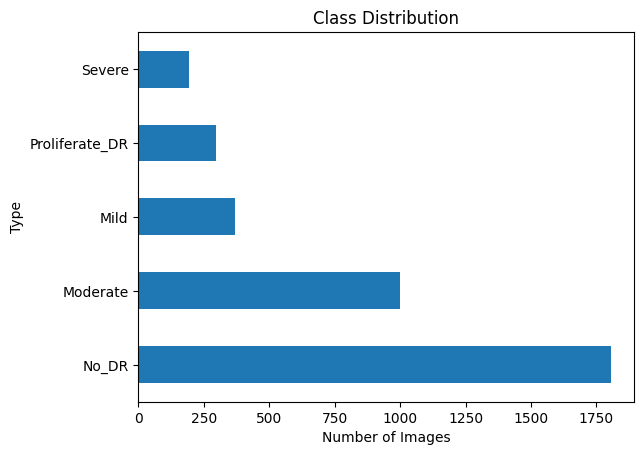

In [ ]:
df['type'].value_counts().plot(kind='barh')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Type')
plt.show()


In [ ]:
train_intermediate, val = train_test_split(df, test_size=0.15, stratify=df['type'])
train, test = train_test_split(train_intermediate, test_size=0.15 / (1 - 0.15), stratify=train_intermediate['type'])


In [ ]:
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for directory in [base_dir, train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

def copy_images(dataframe, src_dir, dst_dir):
    for index, row in dataframe.iterrows():
        diagnosis = row['type']
        id_code = row['id_code'] + ".png"
        srcfile = os.path.join(src_dir, diagnosis, id_code)
        dstfile = os.path.join(dst_dir, diagnosis)
        os.makedirs(dstfile, exist_ok=True)
        shutil.copy(srcfile, dstfile)

src_dir = '/content/drive/MyDrive/archive/gaussian_filtered_images/gaussian_filtered_images'
copy_images(train, src_dir, train_dir)
copy_images(val, src_dir, val_dir)
copy_images(test, src_dir, test_dir)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='categorical')
val_batches = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='categorical')
test_batches = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='categorical')


Found 2562 images belonging to 5 classes.
Found 550 images belonging to 5 classes.
Found 550 images belonging to 5 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(diagnosis_dict), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_batches, validation_data=val_batches, epochs=30)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 191ms/step - accuracy: 0.5354 - loss: 1.4827 - val_accuracy: 0.6836 - val_loss: 0.8605
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.7029 - loss: 0.8435 - val_accuracy: 0.6764 - val_loss: 0.8776
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7142 - loss: 0.7944 - val_accuracy: 0.7018 - val_loss: 0.8141
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.7186 - loss: 0.7619 - val_accuracy: 0.7109 - val_loss: 0.8274
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.7290 - loss: 0.7588 - val_accuracy: 0.7018 - val_loss: 0.7844
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.7357 - loss: 0.7372 - val_accuracy: 0.7218 - val_loss: 0.7949
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7372 - loss: 0.7201 - val_accuracy: 0.7036 - val_loss: 0.7774
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.7432 - loss: 0.7122 - val_accuracy: 0.7018 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.2f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7289 - loss: 1.6397
Test Accuracy: 0.75


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    directory='/content/data/test',  # Adjust the path accordingly
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep shuffle as False for evaluation
)


Found 550 images belonging to 5 classes.


In [ ]:
# Generate predictions on the test dataset
y_pred = model.predict(test_generator)

# Convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes  # True labels


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step


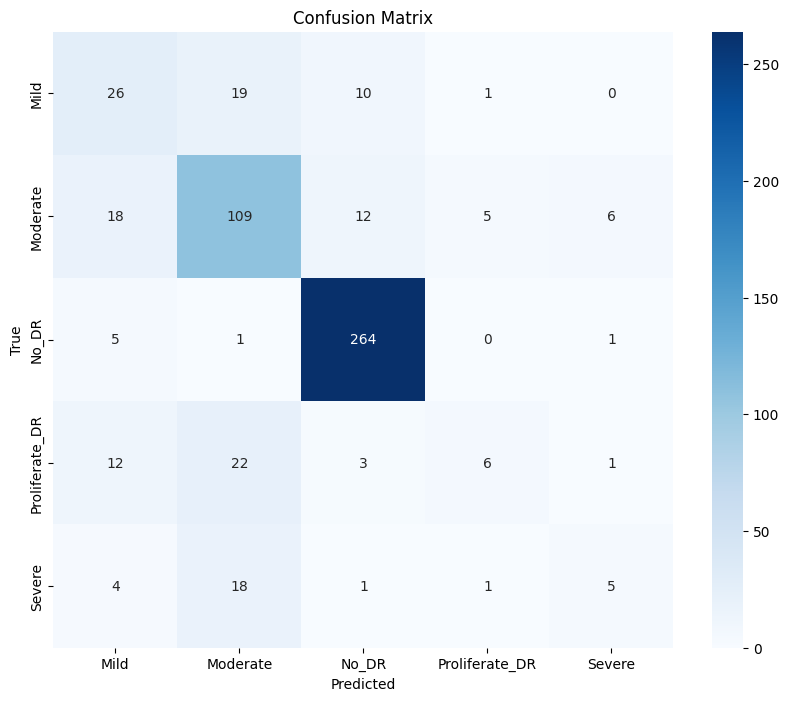

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


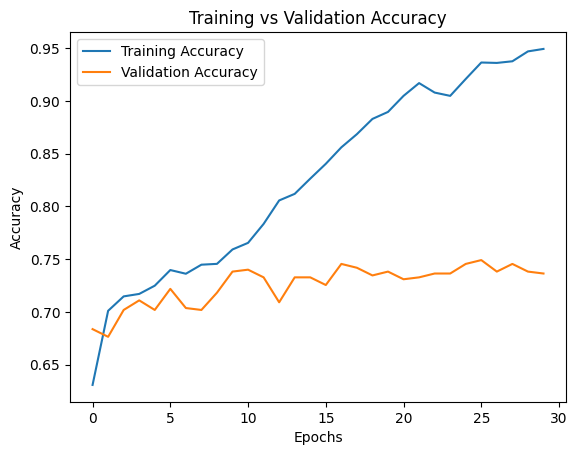

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the training history returned by model.fit()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1-Score: {f1:.2f}')


Accuracy: 74.55%
F1-Score: 0.72


In [ ]:
def predict_class(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction, axis=1)
    return diagnosis_dict[class_index[0]]

predicted_class = predict_class('/content/drive/MyDrive/archive/gaussian_filtered_images/gaussian_filtered_images/Severe/07122e268a1d.png')
print(f'The predicted class is: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The predicted class is: Severe


In [ ]:
model.save('diabetic_retinopathy_model.h5')
